In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score,  confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE


In [31]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [32]:
data.shape

(10002, 14)

In [33]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [35]:
data.dtypes.value_counts()

int64      6
float64    5
object     3
Name: count, dtype: int64

In [36]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
data.dropna(inplace=True)

In [38]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
data.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [40]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [41]:
data['Exited'].value_counts()

Exited
0    7960
1    2038
Name: count, dtype: int64

In [42]:
cat_var = data.select_dtypes('object')
num_var = data.select_dtypes(['int', 'float'])

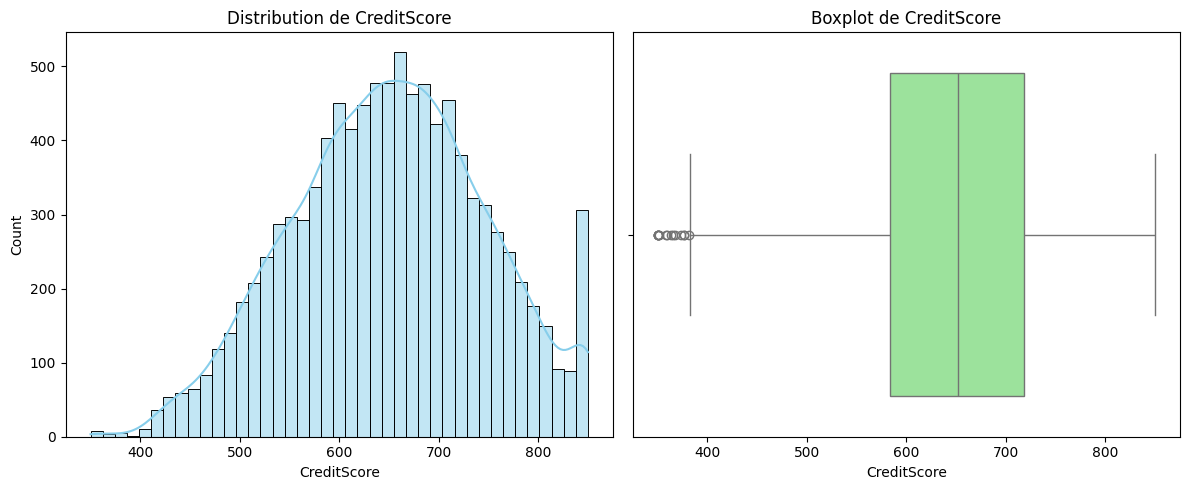

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.9939328082651309 p-value : 3.644082749967835e-20
Les données ne suivent pas une distribution normale
-0.07225089586249218


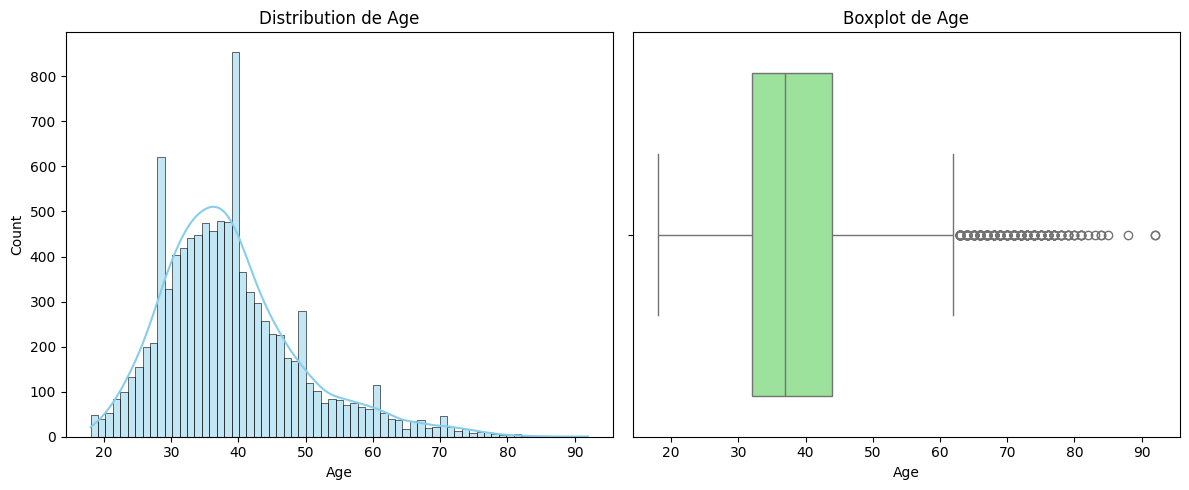

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.9440486609592561 p-value : 1.264339846033915e-51
Les données ne suivent pas une distribution normale
1.0118123403782395


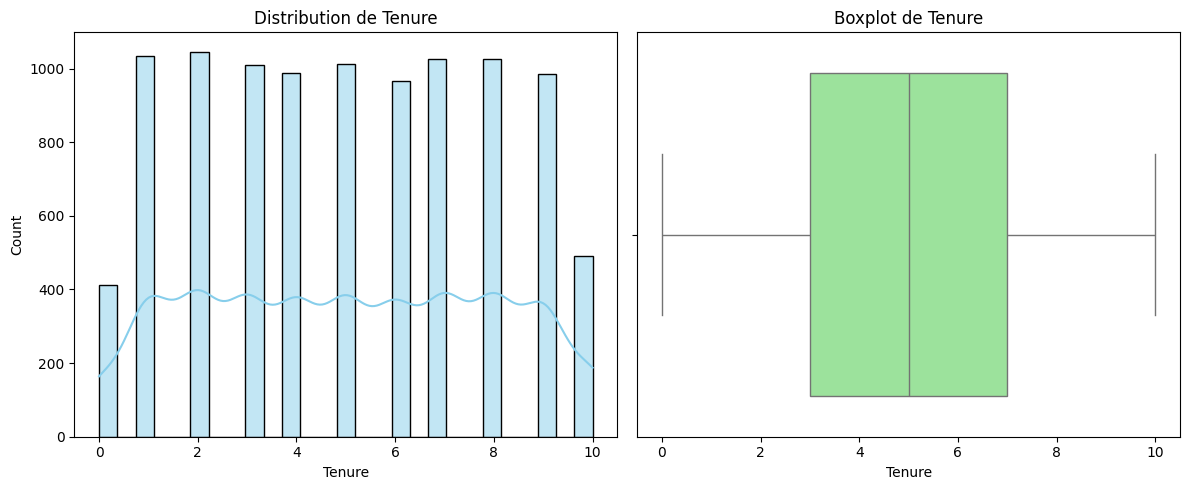

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.948641371910116 p-value : 3.96052824062642e-50
Les données ne suivent pas une distribution normale
0.010943741778199158


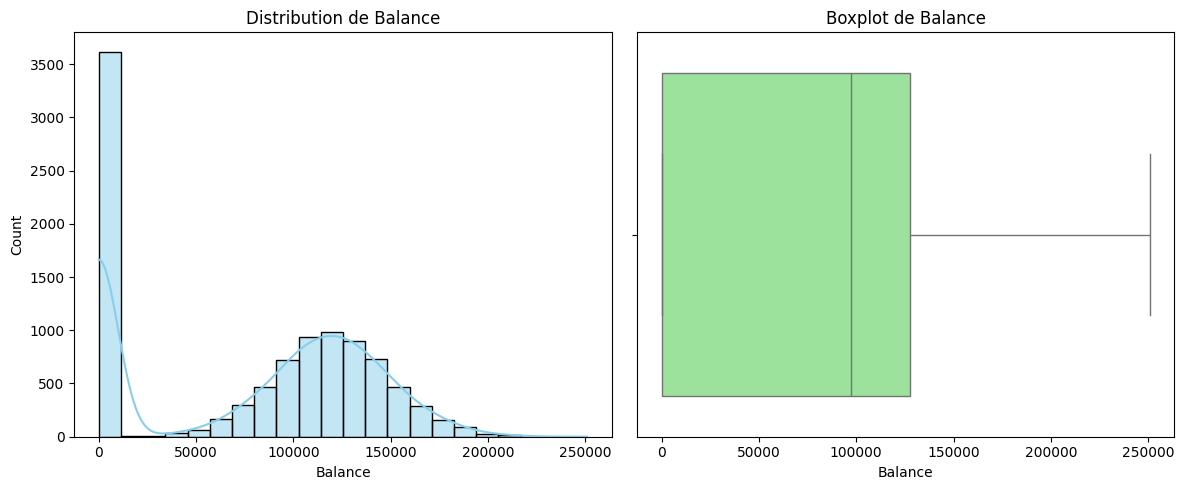

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.8456224255443208 p-value : 4.410891943000896e-71
Les données ne suivent pas une distribution normale
-0.14095159559282477


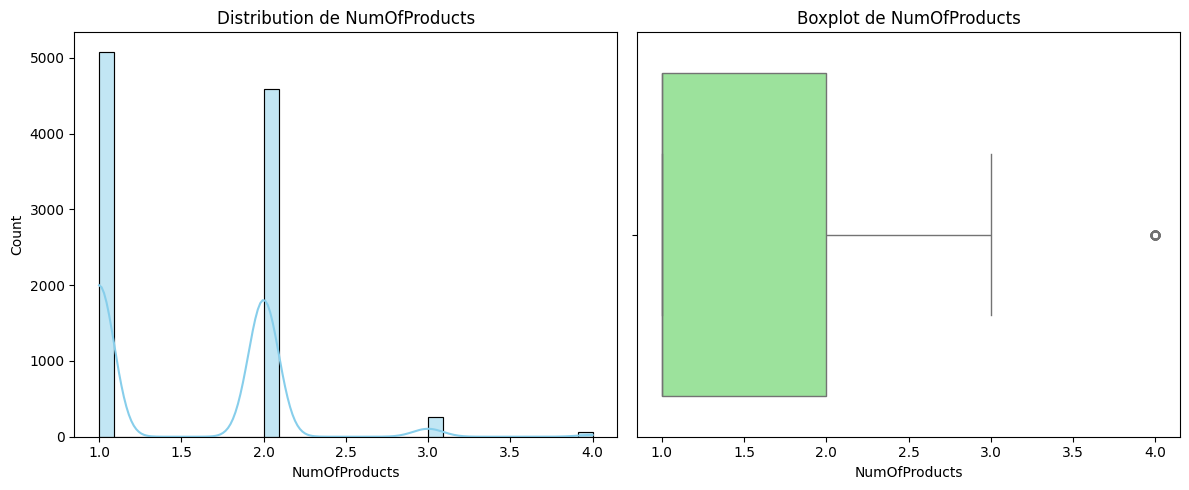

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.7060995381216508 p-value : 4.4123525059310046e-85
Les données ne suivent pas une distribution normale
0.7456511567448407


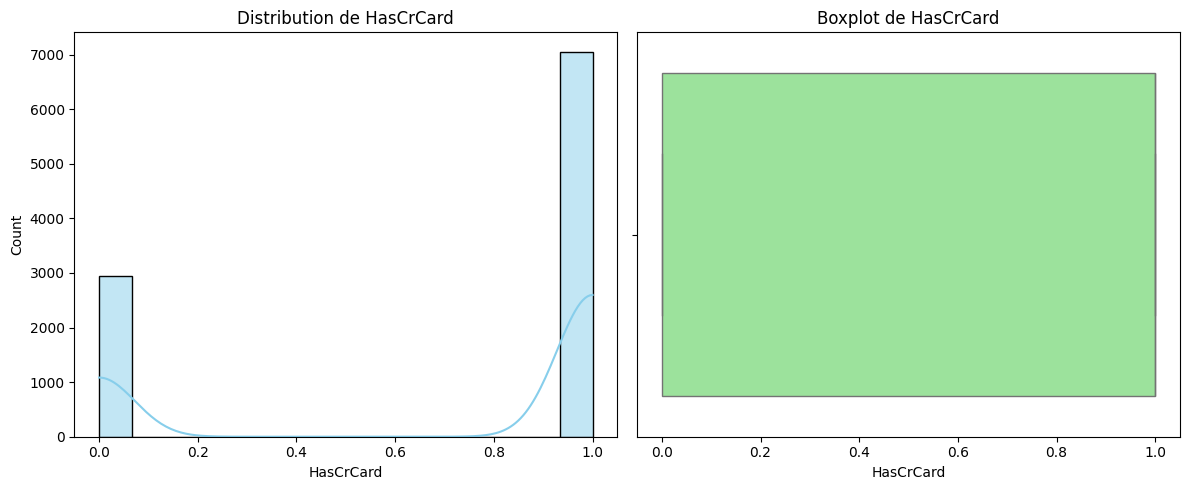

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.5720609481913379 p-value : 7.583582830993703e-94
Les données ne suivent pas une distribution normale
-0.9020287008364388


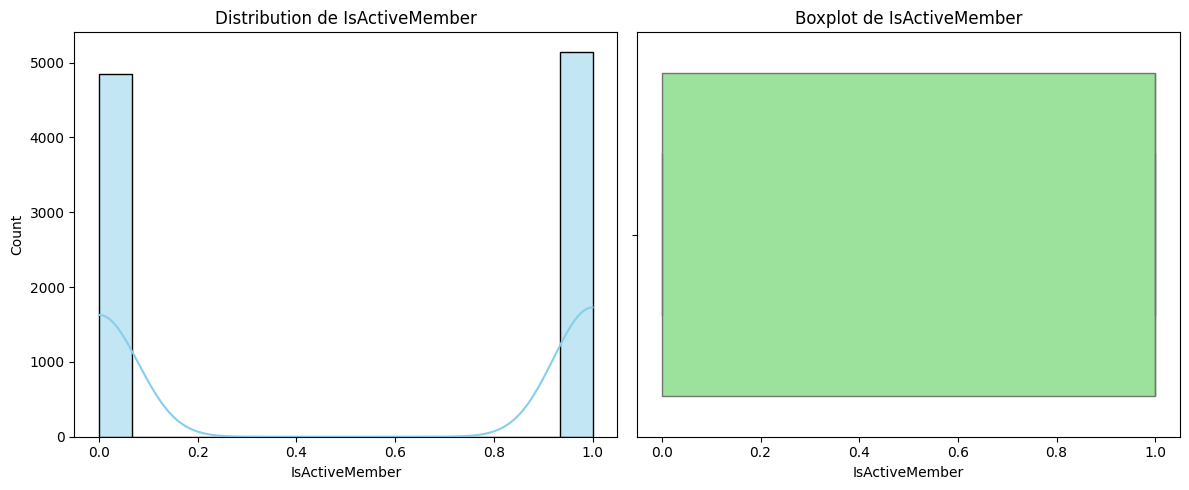

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.6363068369209758 p-value : 5.348756796763183e-90
Les données ne suivent pas une distribution normale
-0.059246698495791214


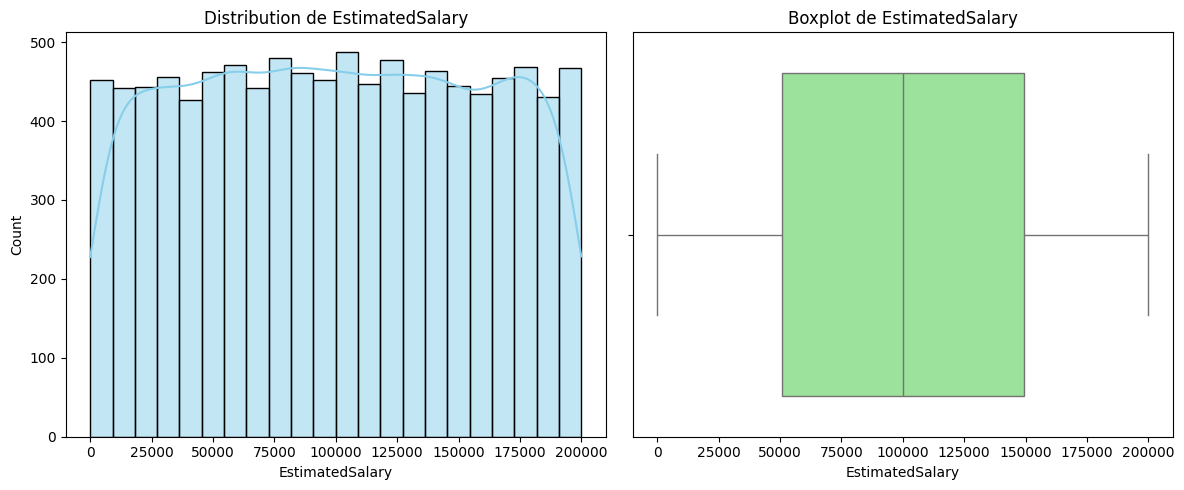

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


Statistique de test : 0.9566321210427929 p-value : 3.0522690825668844e-47
Les données ne suivent pas une distribution normale
0.0018717294018936969


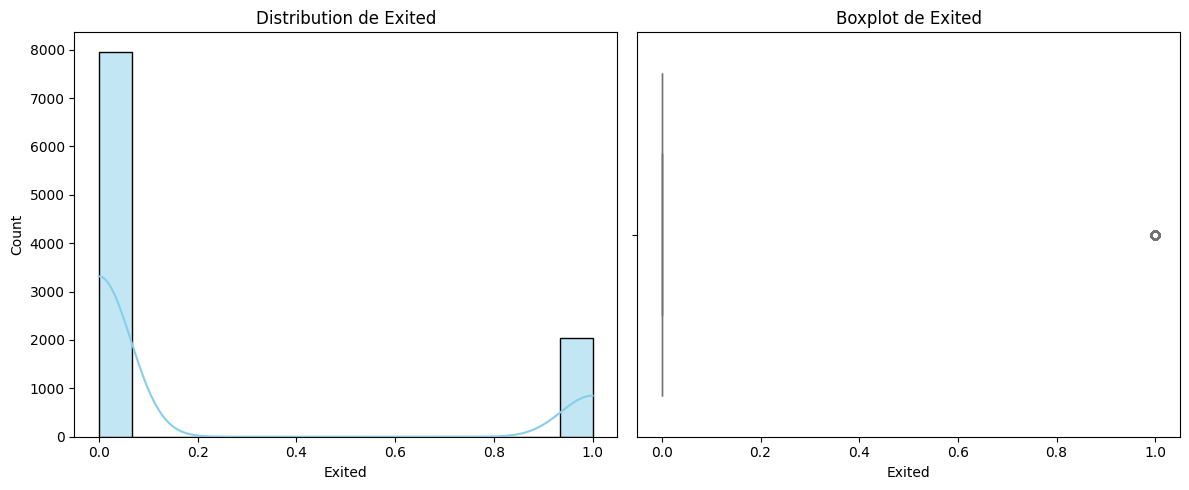

Statistique de test : 0.49407263427086 p-value : 6.815772677367319e-98
Les données ne suivent pas une distribution normale
1.47053357315491


c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9998.
  res = hypotest_fun_out(*samples, **kwds)


In [43]:
from scipy import stats
for var in num_var:
    plt.figure(figsize=(12,5))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f'Distribution de {var}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()

    stat, p = stats.shapiro(data[var])
    print('Statistique de test :', stat, 'p-value :', p)
    if p > 0.05:
        print('Les données suivent une distribution normale')
    else:
        print('Les données ne suivent pas une distribution normale')
        print(data[var].skew())

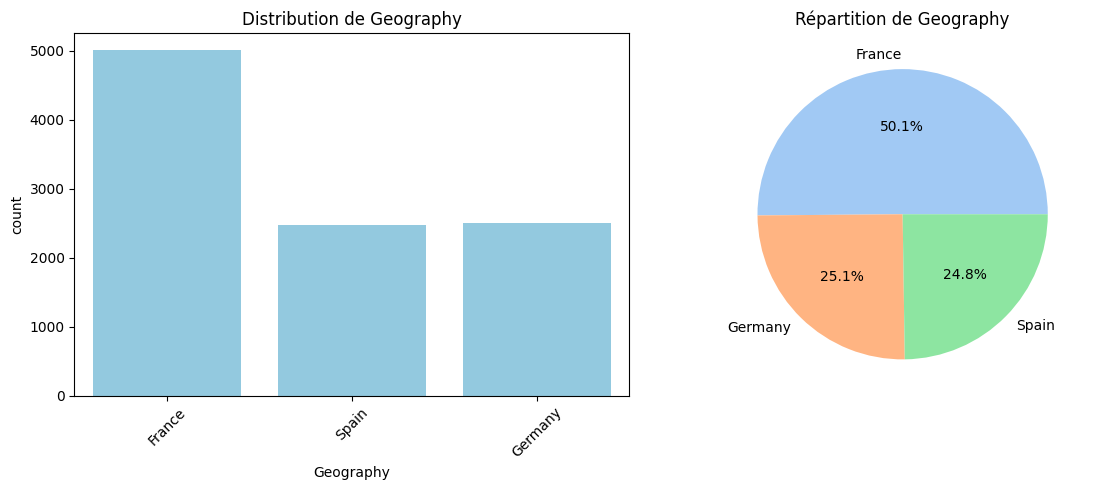

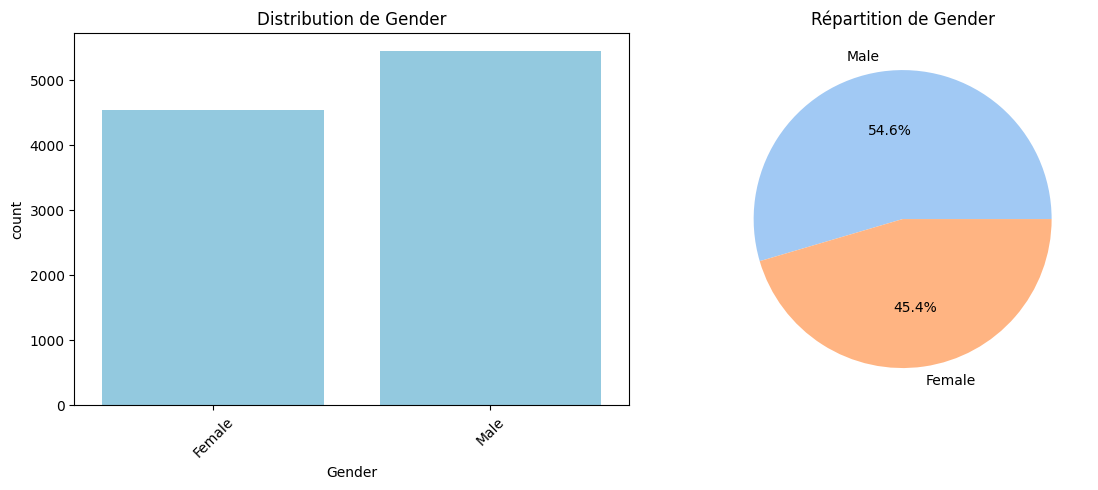

In [44]:
for var in cat_var:
    plt.figure(figsize=(12,5))
    
    # Barplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[var], color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)

    # Pieplot
    plt.subplot(1, 2, 2)
    data[var].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Répartition de {var}')
    plt.ylabel('')  # Enlève l'étiquette "y"

    plt.tight_layout()
    plt.show()

Test t pour CreditScore: Statistique t = 8378458.0000, P-value = 0.0215


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


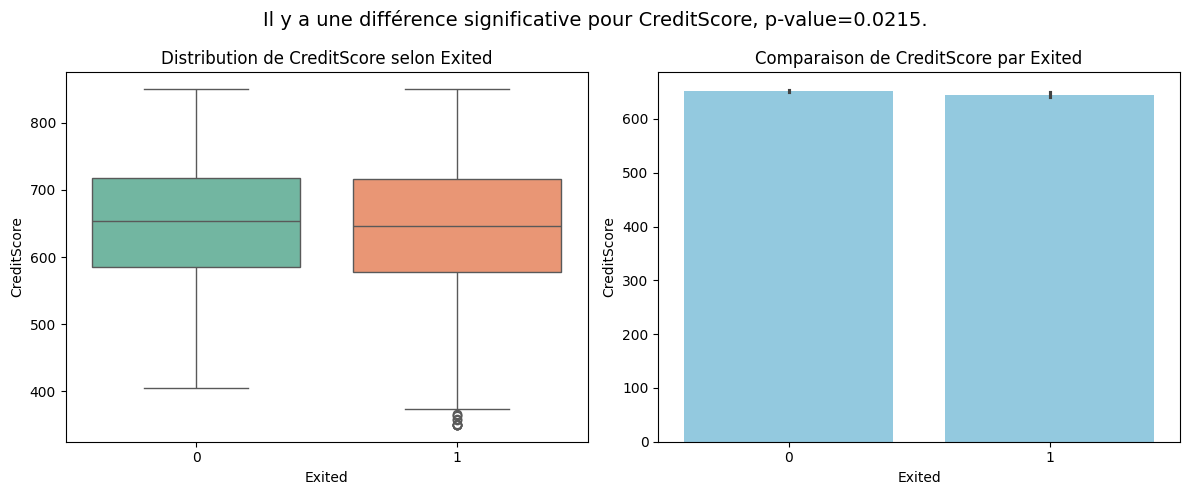

Test t pour Age: Statistique t = 4344622.5000, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


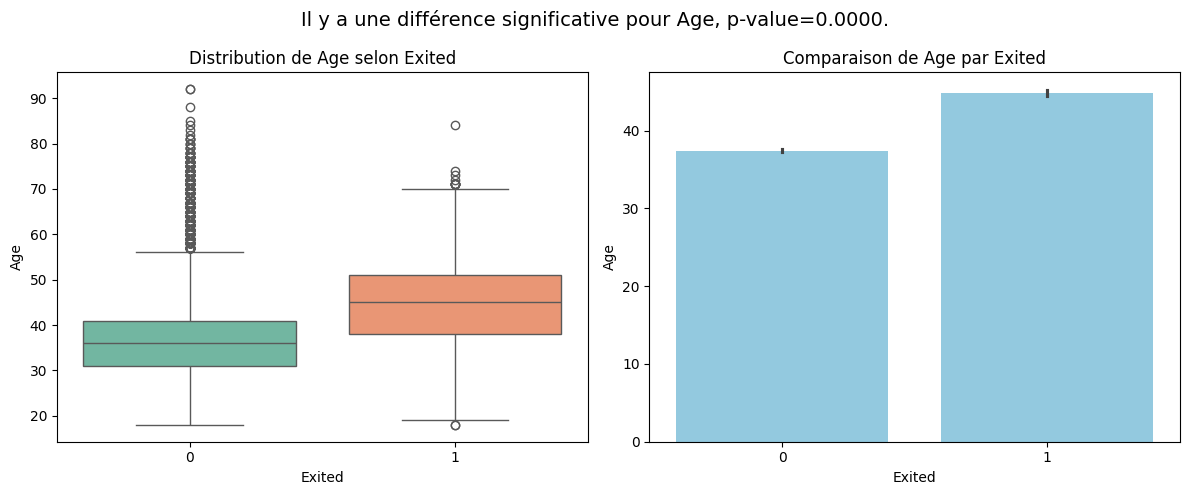

Test t pour Tenure: Statistique t = 8275359.0000, P-value = 0.1561


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


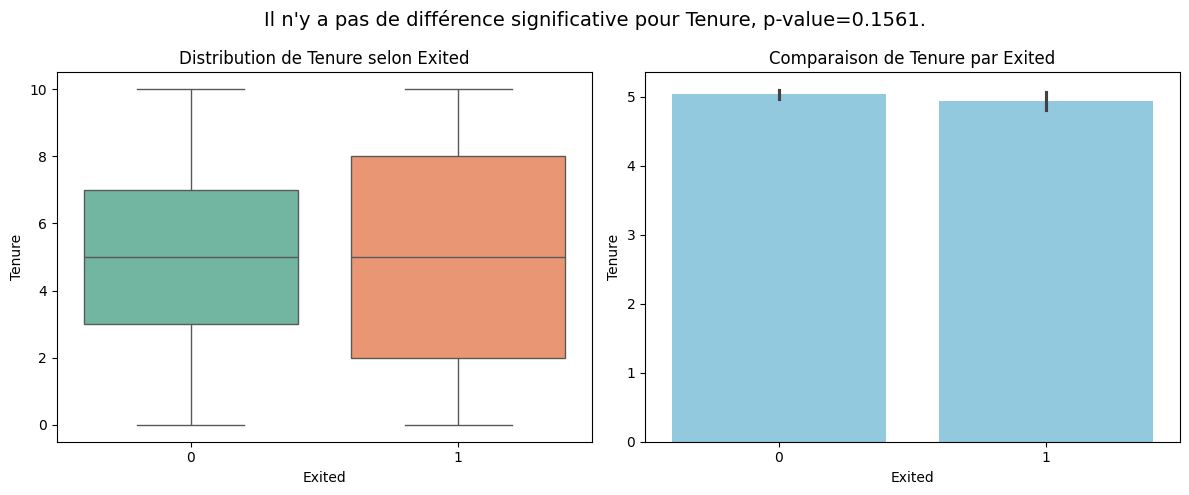

Test t pour Balance: Statistique t = 6850529.5000, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


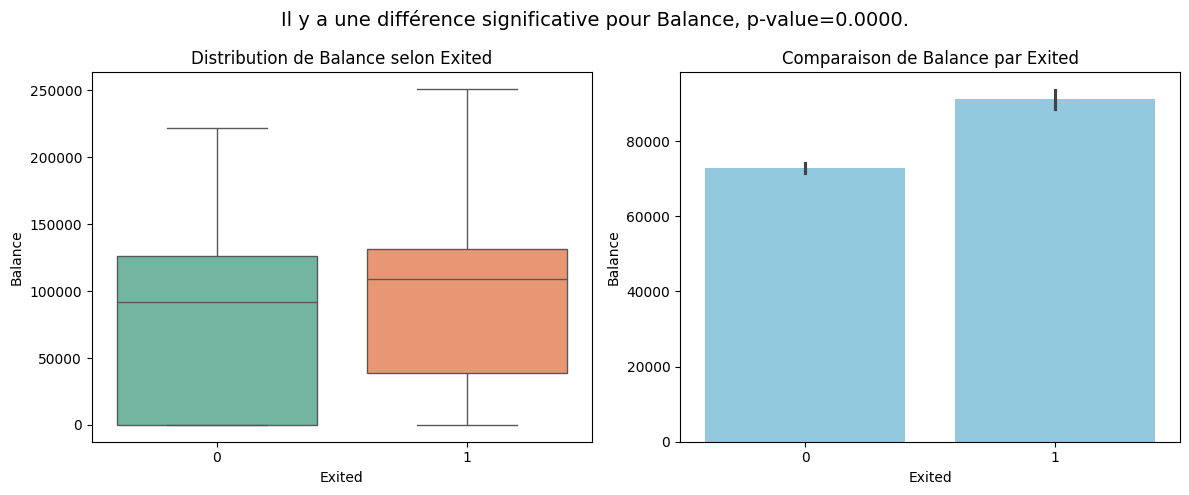

Test t pour NumOfProducts: Statistique t = 9388301.0000, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


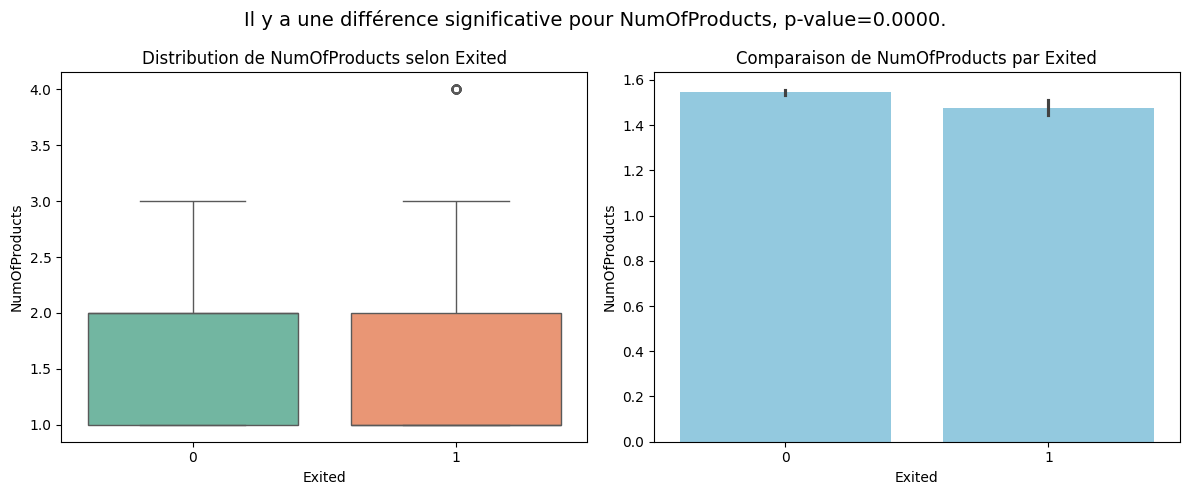

Test t pour HasCrCard: Statistique t = 8175691.0000, P-value = 0.4826


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


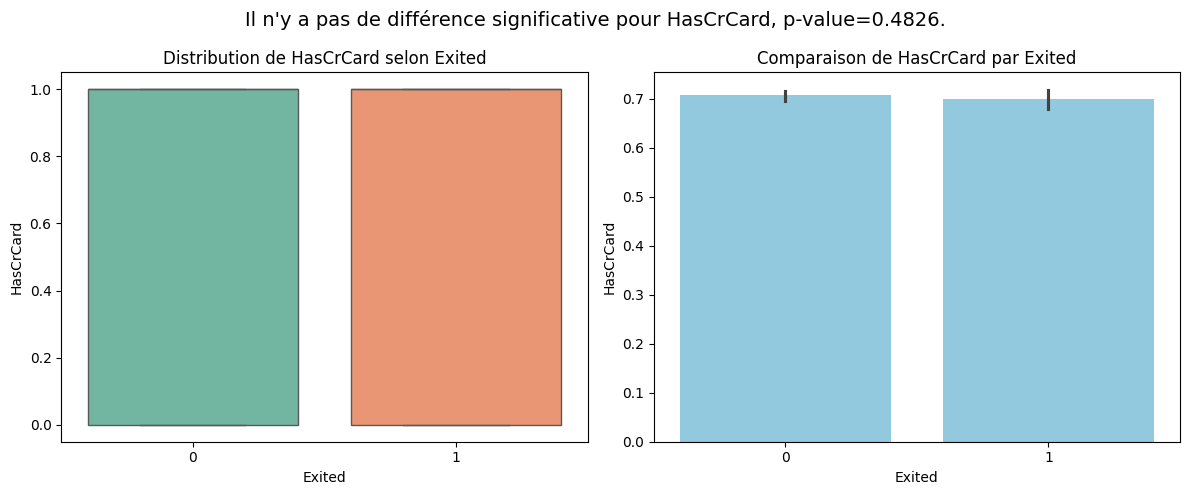

Test t pour IsActiveMember: Statistique t = 9681768.0000, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


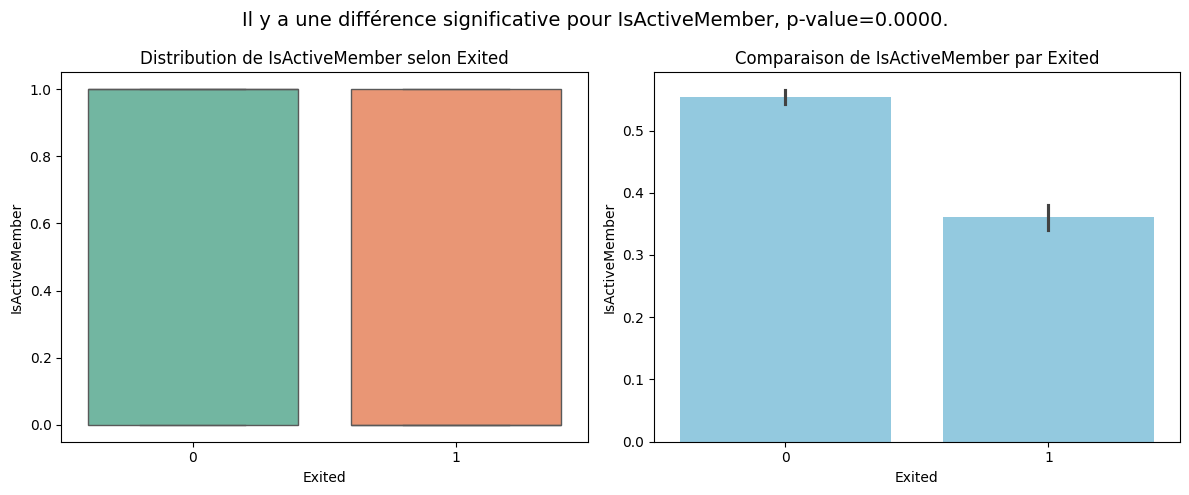

Test t pour EstimatedSalary: Statistique t = 7972135.0000, P-value = 0.2315


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


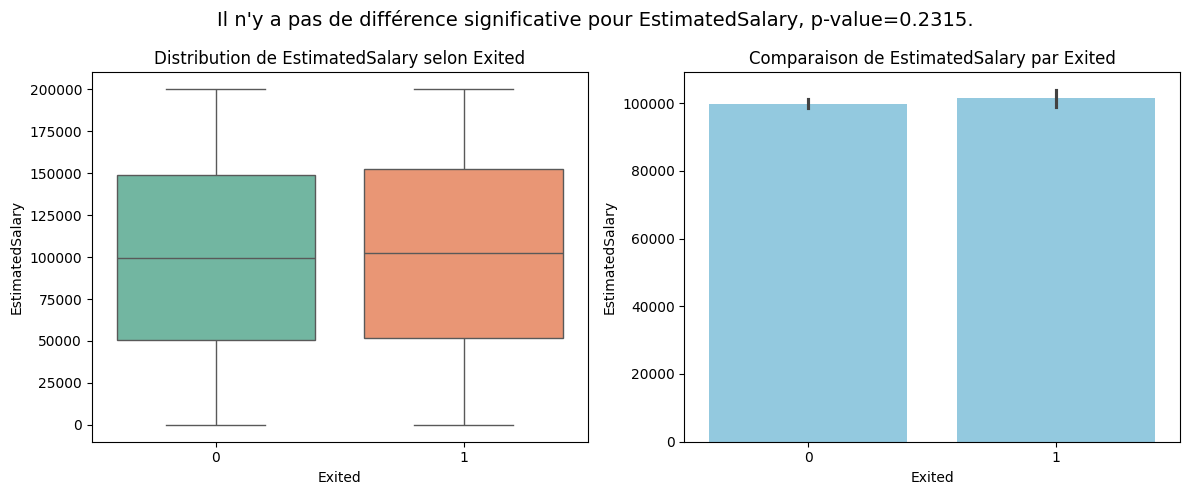

Test t pour Exited: Statistique t = nan, P-value = 0.2315


C:\Users\PP\AppData\Local\Temp\ipykernel_18188\133433922.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=var, data=data, palette='Set2')


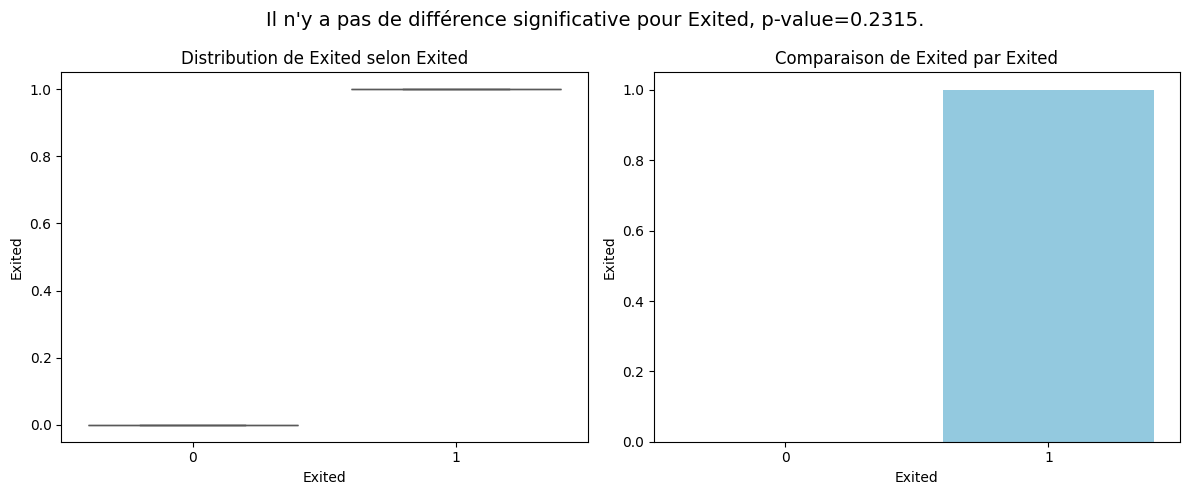

In [45]:
from scipy.stats import mannwhitneyu


for var in num_var:
    plt.figure(figsize=(12, 5))
    
    group1 = data[data['Exited'] == 0][var]
    group2 = data[data['Exited'] == 1][var]
    
    if len(group1) > 1 and len(group2) > 1 and group1.nunique() > 1 and group2.nunique() > 1:
        stat, p_value = mannwhitneyu(group1.dropna(), group2.dropna(), nan_policy='omit')
    else:
        stat = np.nan
    
    print(f"Test t pour {var}: Statistique t = {stat:.4f}, P-value = {p_value:.4f}")
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Exited', y=var, data=data, palette='Set2')
    plt.title(f'Distribution de {var} selon Exited')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Exited', y=var, data=data, color='skyblue')
    plt.title(f'Comparaison de {var} par Exited')
    
    if p_value is not np.nan and p_value < 0.05:
        plt.suptitle(f'Il y a une différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)
    else:
        plt.suptitle(f'Il n\'y a pas de différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)

    plt.tight_layout()
    plt.show()

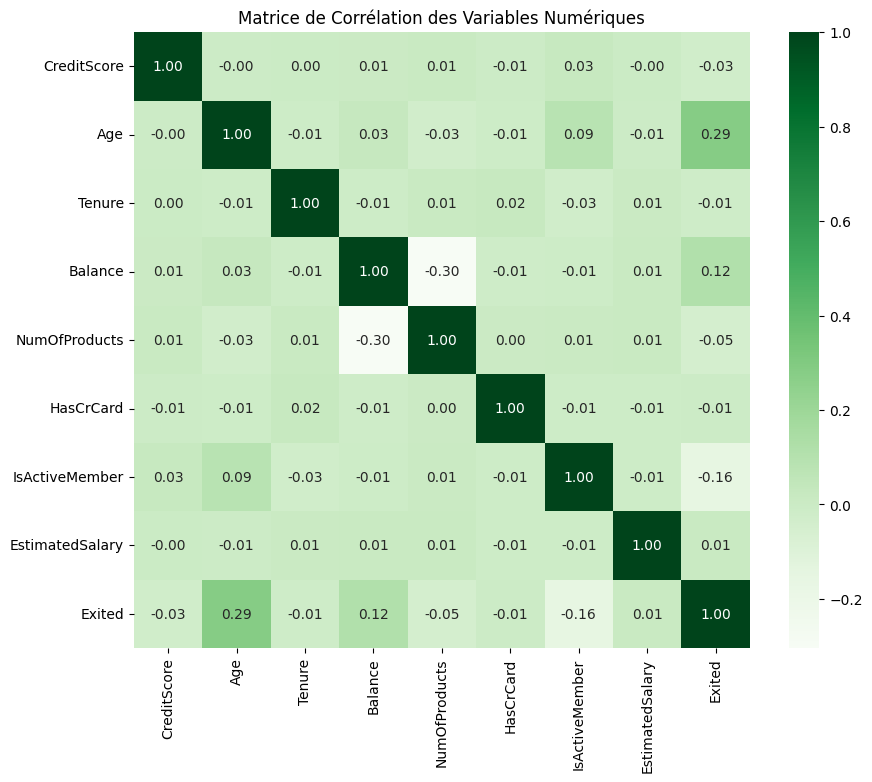

In [46]:
corr_matrix = num_var.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


Variable: Geography
Tableau de contingence :
Exited        0    1
Geography           
France     4202  810
Germany    1695  815
Spain      2063  413
Chi2 = 301.9215, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.1732


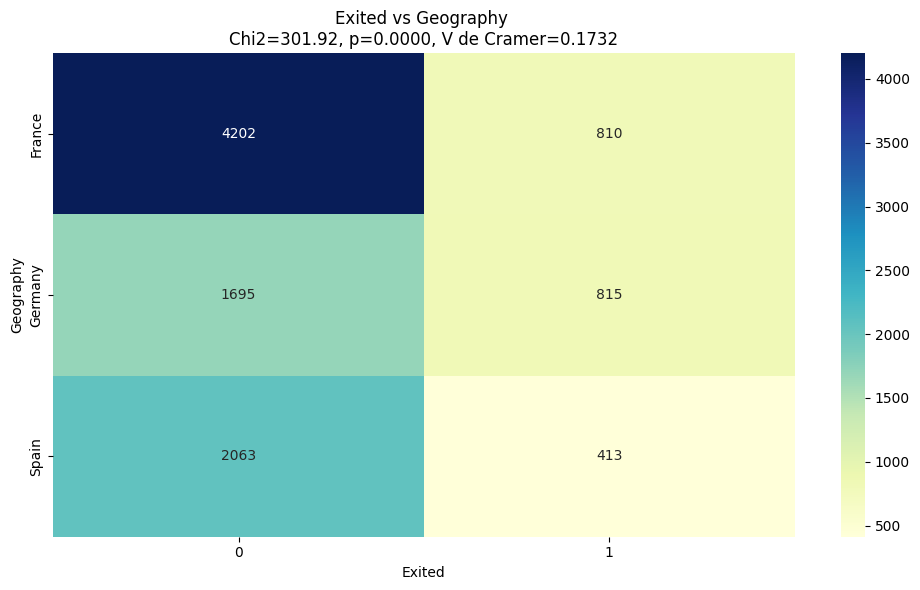


Variable: Gender
Tableau de contingence :
Exited     0     1
Gender            
Female  3404  1139
Male    4556   899
Chi2 = 112.2028, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1055


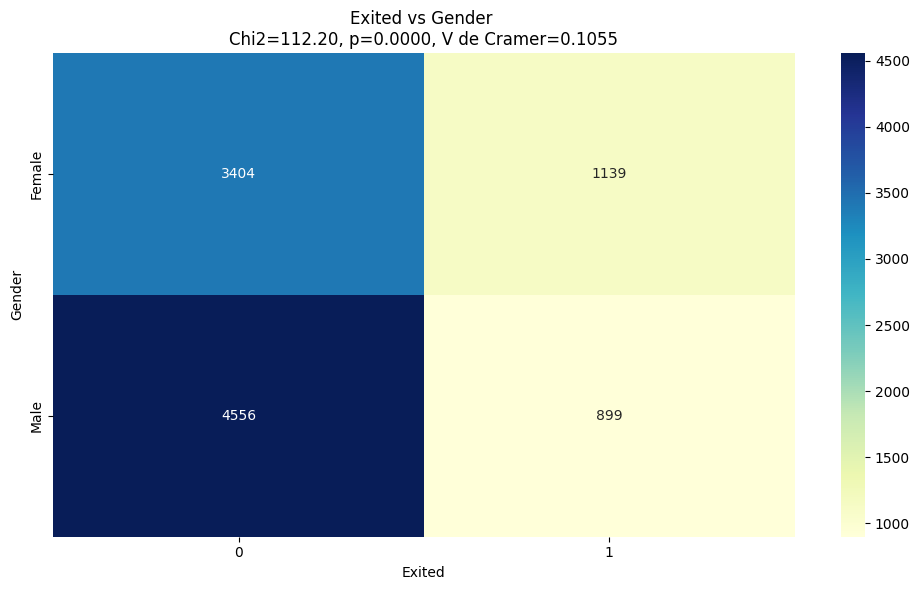

In [47]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
target_column = 'Exited'

# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # correction pour les petits échantillons
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Boucle sur chaque variable catégorielle
for var in cat_var:
    print(f"\nVariable: {var}")
    
    # Tableau de contingence
    contingency_table = pd.crosstab(data[var], data[target_column])
    print("Tableau de contingence :")
    print(contingency_table)
    
    # Test du khi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # V de Cramer
    v_cramer = cramers_v(contingency_table)
    
    print(f"Chi2 = {chi2:.4f}, p-value = {p_value:.4f}, degrés de liberté = {dof}")
    print(f"V de Cramer = {v_cramer:.4f}")
    
    # Graphique : Heatmap du tableau de contingence
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Exited vs {var} \nChi2={chi2:.2f}, p={p_value:.4f}, V de Cramer={v_cramer:.4f}')
    plt.xlabel('Exited')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [48]:
df = data.copy()

In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [50]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [51]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,False,False,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,False,False,False


In [52]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [53]:
scaler = StandardScaler()

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((7998, 11), (2000, 11))

In [55]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)

Resampled X_train shape: (12736, 11)
Resampled y_train shape: (12736,)


In [56]:
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))


def conf_mat(model, features, labels):
        cm = confusion_matrix(labels,  model.predict(features))

        # 👉 Affichage en heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Prédictions')
        plt.ylabel('Valeurs Réelles')
        plt.title('Matrice de Confusion')
        plt.show()

def courbe_roc(model, features, labels,features_val, labels_val):
      
    # Courbe ROC pour le jeu de données test
    # Courbe ROC
    y_train_pred_prob = model.predict_proba(features)[:,1]
    y_test_pred_prob = model.predict_proba(features_val)[:,1]

    fpr_test, tpr_test, _ = roc_curve(labels_val, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Courbe ROC pour le jeu de données d'entraînement
    fpr_train, tpr_train, _ = roc_curve(labels, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Affichage des courbes ROC
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [57]:
param_grid  = {'C':[0.001, 0.01 ,0.1 , 1, 10, 50 , 100, 500]}

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=500), param_grid=param_grid, scoring='recall', cv=5)

logreg_model = grid_logreg_class.fit(X_train, y_train)

print(round(logreg_model.best_score_,3))

print(logreg_model.best_estimator_)

0.711
LogisticRegression(C=0.01, max_iter=500, random_state=42)


In [58]:
recall_score(y_test, logreg_model.best_estimator_.predict(X_test))


0.6862745098039216

In [59]:
model_evaluation(logreg_model.best_estimator_, X_test, y_test)


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1592
           1       0.39      0.69      0.49       408

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.71      0.74      2000



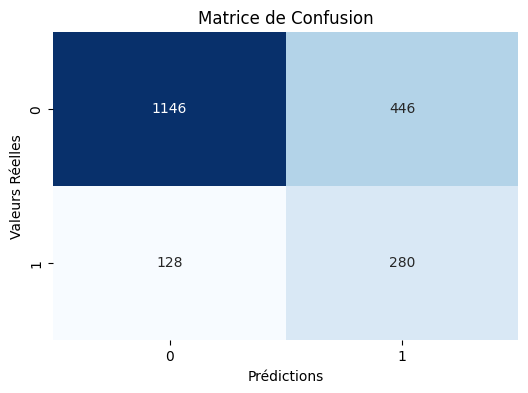

In [60]:
conf_mat(logreg_model.best_estimator_, X_test, y_test)

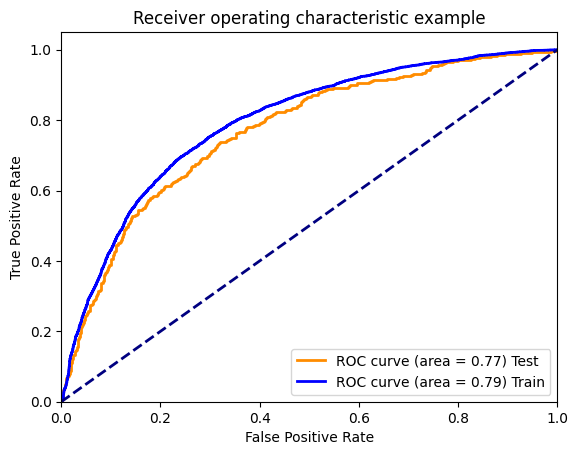

In [61]:
courbe_roc(logreg_model.best_estimator_, X_train, y_train,X_test, y_test)


In [62]:
svm_model = SVC(random_state=42)

svc_param = {
    'kernel':['linear','rbf'],
    'C':[0.1, 1.0, 10, 50, 100]
}

svc_cv = GridSearchCV(svm_model, svc_param, scoring='f1', cv=5)

svc_model = svc_cv.fit(X_train, y_train)

print(round(svc_model.best_score_,3))

print(svc_model.best_estimator_)

0.862
SVC(C=100, random_state=42)


In [63]:
recall_score(y_test, svc_model.best_estimator_.predict(X_test))

0.6078431372549019

In [64]:
model_evaluation(svc_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1592
           1       0.50      0.61      0.55       408

    accuracy                           0.80      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.81      0.80      0.80      2000



In [65]:
from sklearn.ensemble import AdaBoostClassifier

adab_model = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}

adab_cv = GridSearchCV(adab_model, param_grid, scoring='f1', cv=5)

adab_model = adab_cv.fit(X_train, y_train)

print(round(adab_model.best_score_,3))

print(adab_model.best_estimator_)

0.807
AdaBoostClassifier(n_estimators=300, random_state=42)


In [66]:
recall_score(y_test, adab_model.best_estimator_.predict(X_test))


0.7205882352941176

In [67]:
model_evaluation(adab_model.best_estimator_, X_test, y_test)


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1592
           1       0.52      0.72      0.60       408

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



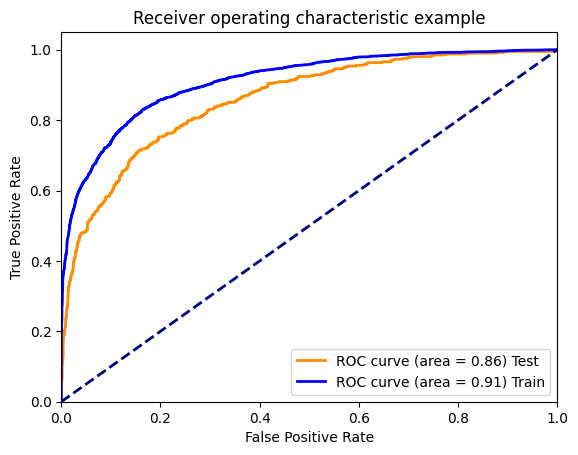

In [68]:
courbe_roc(adab_model.best_estimator_, X_train, y_train,X_test, y_test)


In [69]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000],
    
    
}


xgb_cv = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=5)

xgb_model = xgb_cv.fit(X_train, y_train)

print(round(xgb_model.best_score_,3))

print(xgb_model.best_estimator_)

0.883
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)


In [70]:
recall_score(y_test, xgb_model.best_estimator_.predict(X_test))


0.5392156862745098

In [71]:
model_evaluation(xgb_model.best_estimator_, X_test, y_test)


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1592
           1       0.61      0.54      0.57       408

    accuracy                           0.83      2000
   macro avg       0.75      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



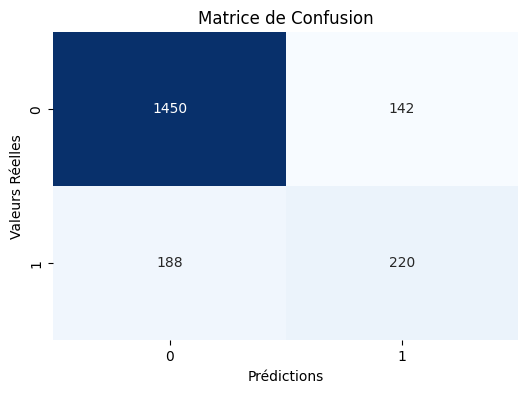

In [72]:
conf_mat(xgb_model.best_estimator_, X_test, y_test)


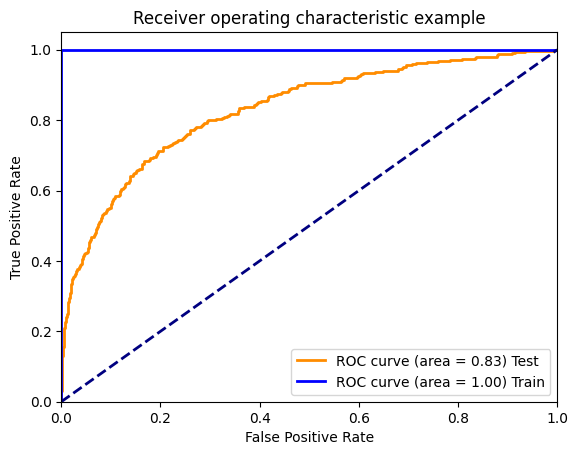

In [73]:
courbe_roc(xgb_model.best_estimator_, X_train, y_train,X_test, y_test)